In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
df = pd.read_csv("Q:/4. Learning/3nd year students/1. Data business analytics/Report Data Business Analytics/time-series-forecasting/Dataset/Microsoft_Stock.csv")
# 2. Đọc file csv và gắng index với giá Close
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 6s 176ms/step - loss: 0.0150 - val_loss: 0.0865
Epoch 2/100
15/15 [==============================] - 2s 134ms/step - loss: 0.0018 - val_loss: 0.0061
Epoch 3/100
15/15 [==============================] - 2s 129ms/step - loss: 4.2075e-04 - val_loss: 0.0039
Epoch 4/100
15/15 [==============================] - 2s 125ms/step - loss: 2.1392e-04 - val_loss: 0.0034
Epoch 5/100
15/15 [==============================] - 3s 205ms/step - loss: 1.7915e-04 - val_loss: 0.0028
Epoch 6/100
15/15 [==============================] - 4s 239ms/step - loss: 1.7332e-04 - val_loss: 0.0038
Epoch 7/100
15/15 [==============================] - 3s 209ms/step - loss: 1.7196e-04 - val_loss: 0.0031
Epoch 8/100
15/15 [==============================] - 3s 209ms/step - loss: 1.6640e-04 - val_loss: 0.0032
Epoch 9/100
15/15 [==============================] - 3s 192ms/step - loss: 1.7101e-04 - val_loss: 0.0043
Epoch 10/100
15/15 [==============================] - 3s 192ms/

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 15ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [12]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 225.30642933517566
Testing RMSE: 172.8240635877247


In [19]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 92, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.9091716]
93
[0.9091716]
94
[0.9091716]
95
[0.9091716]
96
[0.9091716]
97
[0.9091716]
98
[0.9091716]
99
[0.9091716]
100
[0.9091716]
101
9 day input [0.83434294 0.84088911 0.83097215 0.8296043  0.84792379 0.84797264
 0.85461651 0.84894968 0.85940401 0.85530044 0.84978017 0.85036639
 0.85002443 0.85842697 0.83786028 0.83160723 0.84499267 0.84958476
 0.84924279 0.87440156 0.87508549 0.87103078 0.89057157 0.89716659
 0.88290181 0.8913532  0.90214949 0.89819248 0.88612604 0.88974108
 0.8666341  0.86765999 0.84005862 0.86956522 0.87606253 0.86565706
 0.85315095 0.86003908 0.84382022 0.8420127  0.8605276  0.89912066
 0.90219834 0.90698583 0.92447484 0.9381534  0.94093796 0.9703957
 0.93634587 0.97391304 0.97322912 0.99027846 0.98544211 0.9863703
 0.9876893  0.99404006 0.98939912 0.9975574  1.         0.99369809
 0.99614069 0.99413776 0.9803615  0.94880313 0.94274548 0.94899853
 0.92183683 0.93839766 0.96067416 0.9456766  0.914851   0.91079629
 0.9345872  0.91402052 0.94523693 0.93859306 0.96

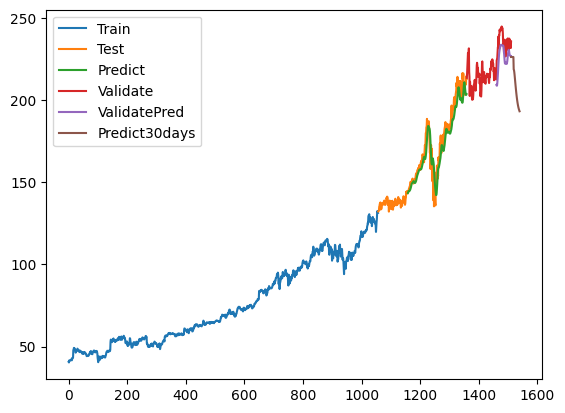

In [20]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()